<a href="https://colab.research.google.com/github/Rakshithbodakuntla/CNN/blob/main/InclassAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

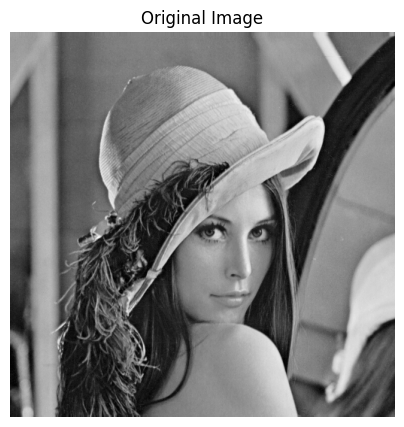

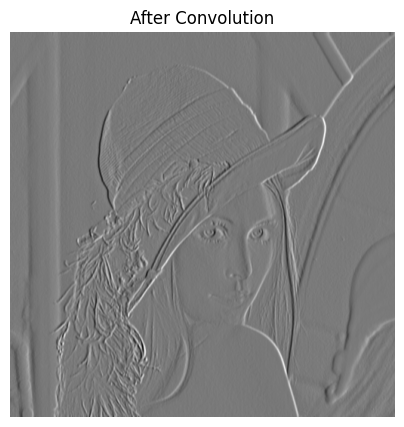

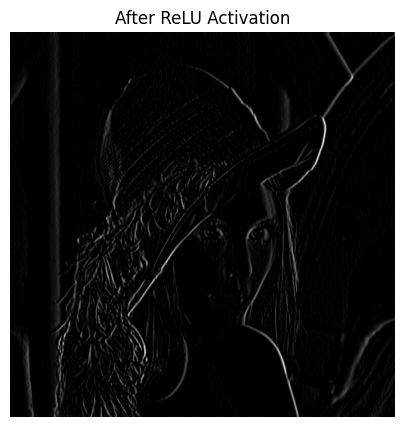

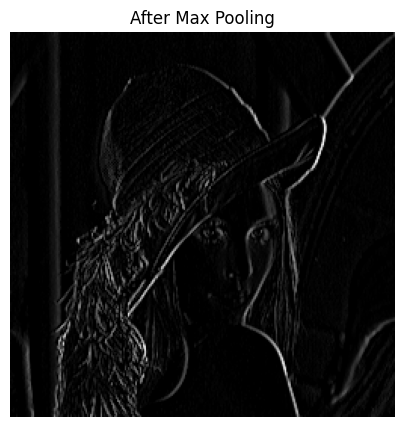

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])  # Sobel filter for edge detection

stride = 1
pool_size = 2


img = cv2.imread(cv2.samples.findFile("sample_image.png"), cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


img = img / 255.0
h, w = img.shape

def apply_convolution(img, kernel, stride):
    kh, kw = kernel.shape
    out_h = (img.shape[0] - kh) // stride + 1
    out_w = (img.shape[1] - kw) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = img[i*stride:i*stride+kh, j*stride:j*stride+kw]
            output[i, j] = np.sum(region * kernel)
    return output

conv_output = apply_convolution(img, kernel, stride)

plt.figure(figsize=(5, 5))
plt.title("After Convolution")
plt.imshow(conv_output, cmap='gray')
plt.axis('off')
plt.show()

relu_output = np.maximum(conv_output, 0)

plt.figure(figsize=(5, 5))
plt.title("After ReLU Activation")
plt.imshow(relu_output, cmap='gray')
plt.axis('off')
plt.show()

def apply_max_pooling(img, pool_size):
    h, w = img.shape
    new_h = h // pool_size
    new_w = w // pool_size
    pooled = np.zeros((new_h, new_w))

    for i in range(0, new_h):
        for j in range(0, new_w):
            region = img[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            pooled[i, j] = np.max(region)
    return pooled

pooled_output = apply_max_pooling(relu_output, pool_size)

plt.figure(figsize=(5, 5))
plt.title("After Max Pooling")
plt.imshow(pooled_output, cmap='gray')
plt.axis('off')
plt.show()
